In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Working with os module - os is a module in Python 3.
# Its main purpose is to interact with the operating system. 
# It provides functionalities to manipulate files and folders.

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-training-svm', 'tf115', 'pca-regre-training', 'data-testing-svm']


In [74]:
print('# File sizes')
for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')

# File sizes
data-training-svm             0.0MB
tf115                         0.0MB
pca-regre-training            0.0MB
data-testing-svm              0.0MB


In [75]:
%%time

file = ('../input/data-training-svm/Data_Training-SVM.csv')
data = pd.read_csv(file, encoding='latin-1')

CPU times: user 4.81 ms, sys: 0 ns, total: 4.81 ms
Wall time: 8.71 ms


In [76]:
data.shape

(699, 10)

In [77]:
data.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561427,1,2,4,5,4,3,3,2,1
1,1234561518,5,2,1,5,3,3,5,3,0
2,1234561282,5,4,5,5,3,4,4,3,1
3,1234561064,3,2,3,5,1,1,5,3,0
4,1234561043,2,4,2,3,2,2,2,4,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ï»¿Customer ID    699 non-null    int64
 1   Age               699 non-null    int64
 2   Income            699 non-null    int64
 3   Education         699 non-null    int64
 4   Occupation        699 non-null    int64
 5   Income.1          699 non-null    int64
 6   Average Balance   699 non-null    int64
 7   Appraisal         699 non-null    int64
 8   Industri          699 non-null    int64
 9   Pelunasan Kredit  699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [79]:
data[data == '?'] = np.nan

In [80]:
for col in ['Income', 'Occupation', 'Pelunasan Kredit']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [81]:
X = data.drop(['Pelunasan Kredit'], axis=1)

y = data['Pelunasan Kredit']

In [82]:
X.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,1234561427,1,2,4,5,4,3,3,2
1,1234561518,5,2,1,5,3,3,5,3
2,1234561282,5,4,5,5,3,4,4,3
3,1234561064,3,2,3,5,1,1,5,3
4,1234561043,2,4,2,3,2,2,2,4


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [84]:
from sklearn import preprocessing

categorical = ['Age', 'Income', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal', 'Industri']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [86]:
X_train.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,-1.772588,-0.024043,-1.422389,-0.011187,-0.679306,-0.695595,-1.438043,0.704975,-0.010006
1,-0.674018,0.667537,-0.728229,-0.694966,-1.381591,0.736598,0.002947,-0.008757,1.387936
2,-1.397214,0.667537,-0.034069,0.672592,0.022979,1.452695,1.443936,-0.722490,0.688965
3,1.595440,0.667537,0.660091,-0.694966,0.022979,-1.411691,0.002947,1.418708,-1.407948
4,0.221367,0.667537,-0.728229,1.356371,0.022979,-0.695595,0.002947,0.704975,-0.708977


In [87]:
#Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Regression accuracy score with all the features: 0.5143


In [88]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.13390866, 0.12592108, 0.1246973 , 0.12102682, 0.10956962,
       0.10357931, 0.10049398, 0.09661517, 0.08418806])

In [89]:
X = data.drop(['Income','Industri'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.1619


In [90]:
X = data.drop(['Income','Industri','Appraisal'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.1810


In [91]:
X = data.drop(['Income','Industri','Appraisal', 'Average Balance'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.1667


In [92]:
X = data.drop(['Income'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal', 'Industri', 'Pelunasan Kredit']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 8


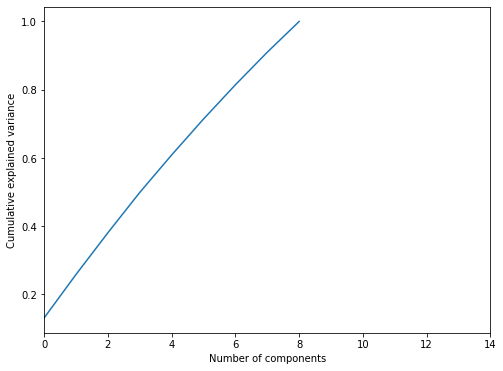

In [93]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()